In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


# Inlupp 2

## Uppgift 1

### a)

Täthetsfunktionen för X
$$
\frac{1}{3}(1 - \frac{x}{6})
$$

### b)

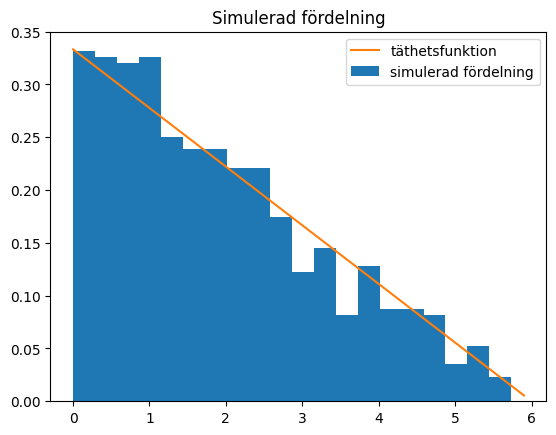

In [3]:
u = np.random.uniform(size=600)
x = 6*(1-np.sqrt(1-u))

fig,ax = plt.subplots()
ax.hist(x,bins = 20,density=True)
_x = np.arange(0,6,0.1)
ax.plot(_x, (1/3)*(1 - (_x/6)))
ax.legend(["täthetsfunktion","simulerad fördelning"])
ax.set_title("Simulerad fördelning")
plt.show()


## Uppgift 2

### a)

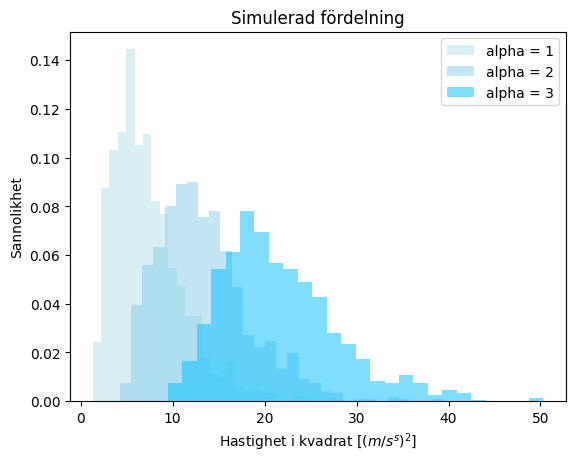

In [4]:
speed = st.maxwell.rvs(1, size=1000)
speed_sqr1 = np.square(speed)

speed = st.maxwell.rvs(2, size=1000)
speed_sqr2 = np.square(speed)

speed = st.maxwell.rvs(3, size=1000)
speed_sqr3 = np.square(speed)

fig, ax = plt.subplots()

ax.hist(speed_sqr1, density=True, bins='auto', alpha=0.5, color='powderblue', label='alpha = 1')
ax.hist(speed_sqr2, density=True, bins='auto', alpha=0.5, color='skyblue', label='alpha = 2')
ax.hist(speed_sqr3, density=True, bins='auto', alpha=0.5, color='deepskyblue', label='alpha = 3')
ax.set_title("Simulerad fördelning")
ax.set_xlabel('Hastighet i kvadrat $[(m/s^s)^2]$')
ax.set_ylabel('Sannolikhet')
ax.legend()

## Uppgift 3

Förklaringsgrad r² = 0.7025770617141349 kraft F = 4.46 N, konfidensintervall 4.1 < F < 4.82, slope = -0.143, intercept = 1.794


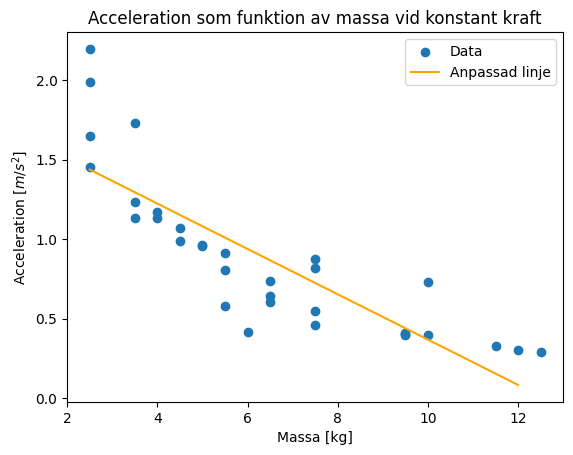

In [6]:
constforce = pd.read_csv('constantforce.csv')

F = constforce['mass(kg)'] * constforce['acceleration(m/s²)']
conf_interval = st.t.interval(0.95, df=len(F)-1, 
              loc=np.mean(F), 
              scale=st.sem(F)) 

result = st.linregress(constforce['mass(kg)'], constforce['acceleration(m/s²)'])

x = np.arange(2.5, 12.5, 0.5)
y = x*result.slope + result.intercept

fig, ax = plt.subplots()

ax.scatter(constforce['mass(kg)'], constforce['acceleration(m/s²)'], label='Data')
ax.plot(x, y, color='orange', label='Anpassad linje')
ax.set_xlabel('Massa [kg]')
ax.set_ylabel('Acceleration $[m/s^2]$')
ax.set_title('Acceleration som funktion av massa vid konstant kraft')
ax.legend()

print(f'Förklaringsgrad r² = {result.rvalue**2} kraft F = {F.mean().round(2)} N, konfidensintervall {conf_interval[0].round(2)} < F < {conf_interval[1].round(2)}, slope = {result.slope.round(3)}, intercept = {result.intercept.round(3)}')

## Uppgift 4

### a)

In [8]:
IceCube = pd.read_csv('IceCube40StringData.csv')

Time = IceCube['MJD'].copy()
dt = Time.diff()

var_coef = dt.std()/dt.mean()

var_coef

1.480667042187389

In [9]:
dt.describe()


count    12875.000000
mean         0.031747
std          0.047007
min          0.000000
25%          0.008322
50%          0.020614
75%          0.041945
max          2.216899
Name: MJD, dtype: float64

### b)

Text(0.5, 1.0, 'Mellanankomsttids fördelning')

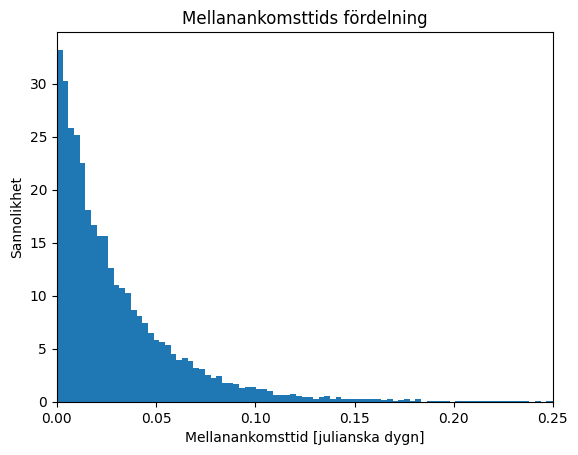

In [10]:
fig, ax = plt.subplots()

ax.hist(dt, density=True, bins='auto')
ax.set_xlim(0,0.25)
ax.set_xlabel('Mellanankomsttid [julianska dygn]')
ax.set_ylabel('Sannolikhet')
ax.set_title('Mellanankomsttids fördelning')

31.498863344861487


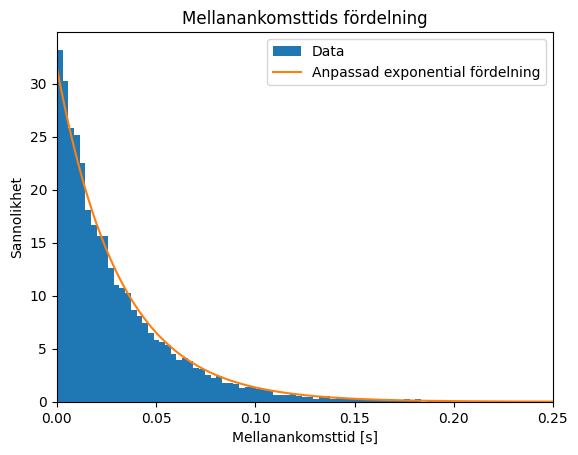

In [11]:
lamda = 1/dt.mean()
fit_x = np.arange(0,1, 0.001)
print(lamda)

fig, ax = plt.subplots()

ax.hist(dt, density=True, bins='auto', label='Data')
ax.plot(fit_x, lamda*np.exp(-lamda*fit_x), label='Anpassad exponential fördelning')
ax.set_xlim(0,0.25)
ax.set_xlabel('Mellanankomsttid [s]')
ax.set_ylabel('Sannolikhet')
ax.set_title('Mellanankomsttids fördelning')
ax.legend()